In [1]:
import numpy as np
import numba as nb
from matplotlib import pyplot as plt

In [2]:
@nb.njit(nb.float64(nb.float64, nb.float64, nb.float64))
def free_particle_density_matrix(x1, x2, beta):
    return 1/np.sqrt(2*np.pi) * np.exp(-0.5*(x1-x2)*(x1-x2)/beta)

In [3]:
beta = 4.0
nbpts = 10000
dtau = beta / nbpts
xstart, xend = 0.0, 1.0
nsteps = 100000

In [4]:
x = np.zeros(nbpts+1)
x[0] = xstart
x[nbpts] = xend

for k in range(1, nbpts):
    dtau_prime = (nbpts - k) * dtau
    meanxk = (dtau_prime * x[k-1] + dtau * x[nbpts]) / (dtau + dtau_prime)
    sigma = np.reciprocal(np.sqrt(1/dtau + 1/dtau_prime))
    x[k] = np.random.normal(meanxk, sigma)

(array([ 733., 1207., 1108., 1332.,  314.,  544.,  940., 1984., 1659.,
         180.]),
 array([-0.86724552, -0.61706713, -0.36688874, -0.11671035,  0.13346804,
         0.38364643,  0.63382483,  0.88400322,  1.13418161,  1.38436   ,
         1.63453839]),
 <BarContainer object of 10 artists>)

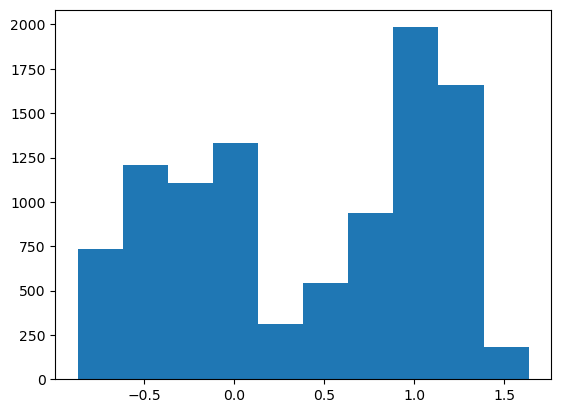

In [5]:
plt.hist(x)